# Задание 1
Задана табличная (сеточная) функция. Имеется информация, что закономерность, представленная этой таблицей, может быть описана формулой:

$$ y = \frac{a_0x}{a_1+a_2x}$$
параметры функции неизвестны и определять их не нужно.

| x | y     | (1) | (2) | (3) | (4) | (5) |
|---|-------|-----|-----|-----|-----|-----|
| 1 | 0.571 |     |     |     |     |     |
| 2 | 0.889 |     |     |     |     |     |
| 3 | 1.091 |     |     |     |     |     |
| 4 | 1.231 |     |     |     |     |     |
| 5 | 1.333 |     |     |     |     |     |
| 6 | 1.412 |     |     |     |     |     |

## Требуется:
1. Вычислить первые разностные производные:
   - (1) односторонняя
   - (2) центральная
   - (3) 2-я формула Рунге (через одностороннюю)
   - (4) с выравнивающими переменными

2. Вычислить вторые разностные производные (столбец 5)

3. Заполнить таблицу:

In [6]:
from derivatives import *
from prettytable import PrettyTable

In [7]:
x = list(range(1, 7))
y = [0.571, 0.889, 1.091, 1.231, 1.333, 1.412]

first_point = [one_side_derivative(y[i], y[i + 1]) for i in range(len(y) - 1)] + [None]
second_point = [None] + [central_derivative(y[i - 1], y[i + 1]) for i in range(1, len(y) - 1)] + [None]
third_point = [None] + [second_runge_formula(y[i - 1], y[i], y[i + 1]) for i in range(1, len(y) - 1)] + [None]
fourth_point = [derivative_with_alignment(y[i], y[i + 1], x[i], x[i + 1]) for i in range(len(y) - 1)] + [None]
five_point = [None] + [second_derivative(y[i - 1], y[i], y[i + 1]) for i in range(1, len(y) - 1)] + [None]

table = PrettyTable(["x", "y", "1", "2", "3", "4", "5"])

for i in range(len(x)):
    row = [x[i], y[i], first_point[i], second_point[i], third_point[i], fourth_point[i], five_point[i]]
    table.add_row(row)

table.float_format = ".3"

print(table)


+---+-------+-------+-------+-------+-------+--------+
| x |   y   |   1   |   2   |   3   |   4   |   5    |
+---+-------+-------+-------+-------+-------+--------+
| 1 | 0.571 | 0.318 |  None |  None | 0.408 |  None  |
| 2 | 0.889 | 0.202 | 0.260 | 0.434 | 0.247 | -0.116 |
| 3 | 1.091 | 0.140 | 0.171 | 0.264 | 0.165 | -0.062 |
| 4 | 1.231 | 0.102 | 0.121 | 0.178 | 0.118 | -0.038 |
| 5 | 1.333 | 0.079 | 0.090 | 0.125 | 0.089 | -0.023 |
| 6 | 1.412 |  None |  None |  None |  None |  None  |
+---+-------+-------+-------+-------+-------+--------+


# Задание 2

Дано обыкновенное дифференциальное уравнение (поставлена краевая задача):

$$
    u'' - 2x^2u' + 4u = 2x + e^{-x}, \quad 0 \leq x \leq 1
$$

с краевыми условиями:
\begin{align*}
    u'(0) &= \alpha, \\
    u'(1) &= \beta u(1) + \gamma
\end{align*}

Заменяя производные соответствующими разностными аналогами, получить разностную схему, которая может быть реализована методом прогонки.

In [8]:
import matplotlib.pyplot as plt
from differential_equation import solve_boundary_problem

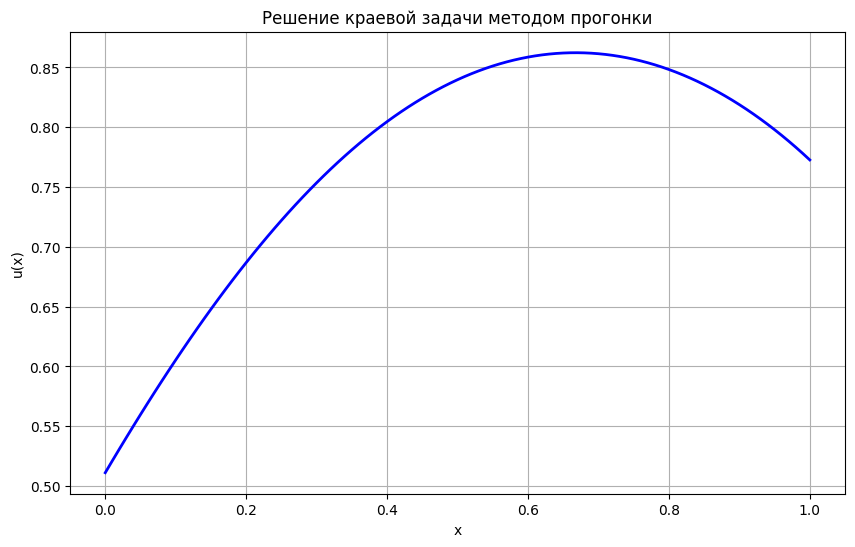

Условие u'(0) = 1.0:
Вычисленное значение u'(0) ≈ 0.994779

Условие u'(1) = 2.0*u(1) + -1.0:
Вычисленное значение u'(1) ≈ -0.541747
Правая часть 2.0*u(1) + -1.0 = 0.545361


In [11]:
alpha = 1.0
beta = 2.0
gamma = -1.0

x, u = solve_boundary_problem(alpha, beta, gamma, N=100)

plt.figure(figsize=(10, 6))
plt.plot(x, u, 'b-', linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение краевой задачи методом прогонки')
plt.show()

print(f"Условие u'(0) = {alpha}:")
u_prime_0 = one_side_derivative(u[0], u[1], x[1] - x[0])
print(f"Вычисленное значение u'(0) ≈ {u_prime_0:.6f}")

print(f"\nУсловие u'(1) = {beta}*u(1) + {gamma}:")
u_prime_1 = one_side_derivative(u[-2], u[-1], x[-1] - x[-2])
rhs = beta * u[-1] + gamma
print(f"Вычисленное значение u'(1) ≈ {u_prime_1:.6f}")
print(f"Правая часть {beta}*u(1) + {gamma} = {rhs:.6f}")
